In [17]:
import numpy as np
import scipy.io as io
import h5py
import deepdish as dd
import dask.array as da
import os

import skimage
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h5path = '../../H5data/M1'
fname = os.listdir(h5path)
thisfile = fname[0]

### Read in using deepdish

In [4]:
### Read in using deepdish
dat = dd.io.load(h5path+'/'+thisfile)

### Manipulate spike data

In [5]:
## Show first ten spike times for unit 5401
dat['spikes']['5401'][:10]

array([ 50.9509    ,  51.11846667,  51.1258    ,  51.1906    ,
        51.20433333,  51.2221    ,  51.23406667,  51.2408    ,
        51.30686667,  51.31446667])

### Manipulate image data

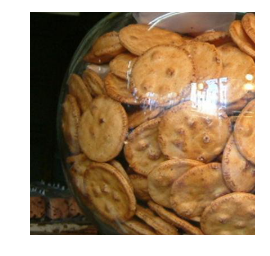

In [85]:
# Extract a patch of arbitrary radius around a fixation
projectpath = '../..'
fx = 65

# Read in the image
impath = dat['eyes'][fx]['impath']
imname = dat['eyes'][fx]['imname']
filename = projectpath+'/'+impath+'/'+imname
I = io.imread(filename)

# Pad the image
[H,W,D] = I.shape
I_pad = 128*np.ones([3*H, 3*W, D])
I_pad[H-1:2*H-1,W-1:2*W-1,0] = I[:,:,0]
I_pad[H-1:2*H-1,W-1:2*W-1,1] = I[:,:,1]
I_pad[H-1:2*H-1,W-1:2*W-1,2] = I[:,:,2]

# Get gaze location
r = int(dat['eyes'][fx]['row'])
c = int(dat['eyes'][fx]['col'])

# If gaze is within the image borders
if(r>0 and r<768 and c>0 and c<1024):
    # Extract patch
    R = 200 #radius
    G = np.zeros([2*R, 2*R, 3])
    G = I_pad[r+H-R:r+H+R, c+W-R:c+W+R, :]
    
    # Show patch
    plt.imshow(np.uint8(G))
    plt.axis('off')
    plt.show()
else:
    print r,c
    print 'outside'

### Read in using dask

In [6]:
# Read in only one neuron's spike train with dask
fr = h5py.File(h5path+'/'+thisfile)
unitid = '5401'
x = da.from_array(fr['/spikes/{}'.format(unitid)], chunks=(100, 1))

In [7]:
x.shape

(17391,)

In [12]:
# Read in only eye movement data
fr = h5py.File(h5path+'/'+thisfile)
field_id = 'row'
x = da.from_npy_stack(fr['/eyes'], chunks=(100, 1))

TypeError: from_npy_stack() got an unexpected keyword argument 'chunks'